# Data Loading

In [0]:
import pandas as pd

In [0]:
df1 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/tables/gym_members_exercise_tracking.csv").toPandas()

# Data Cleaning

In [0]:
def clean_col_name(col_name: str):
  return col_name.replace(" ", "_").replace("(", "").replace(")", "").lower()
df1_renamed = df1.rename(columns={col_name:clean_col_name(col_name) for col_name in df1.columns})


In [0]:
df1_renamed.head(5)

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [0]:
df1_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          973 non-null    int32  
 1   gender                       973 non-null    object 
 2   weight_kg                    973 non-null    float64
 3   height_m                     973 non-null    float64
 4   max_bpm                      973 non-null    int32  
 5   avg_bpm                      973 non-null    int32  
 6   resting_bpm                  973 non-null    int32  
 7   session_duration_hours       973 non-null    float64
 8   calories_burned              973 non-null    float64
 9   workout_type                 973 non-null    object 
 10  fat_percentage               973 non-null    float64
 11  water_intake_liters          973 non-null    float64
 12  workout_frequency_days/week  973 non-null    int32  
 13  experience_level    

We can see that there are no Null values in our data and it is clean to be used in our Analysis

# Analysis

In [0]:
print(f"Max Age in the dataset:")

max_age = df1_renamed.groupby("gender")["age"].max()
print(max_age)

Max Age in the dataset:
gender
Female    59
Male      59
Name: age, dtype: int32


The above findings shows that the maximum age for both genders, male and female, is 59. This indicates that the age distribution in the dataset is consistent across genders at the upper age limit, suggesting no gender-based variation in the oldest participants.

In [0]:
age_over_50 = df1_renamed[df1_renamed["age"] > 50]
age_over_50

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
11,53,Male,51.7,1.70,175,152,72,1.15,865.0,HIIT,23.6,3.5,3,2,17.89
12,57,Male,112.5,1.61,195,165,61,1.24,1013.0,Cardio,22.1,2.7,3,2,43.40
19,55,Female,75.2,1.67,188,167,51,1.37,1030.0,HIIT,25.2,2.2,2,1,26.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,55,Male,69.9,1.81,179,167,57,1.20,992.0,Strength,20.2,2.1,4,2,21.34
962,57,Male,83.4,1.65,172,166,67,1.57,1290.0,HIIT,13.3,3.5,4,3,30.63
963,57,Female,43.8,1.75,180,160,73,1.39,1001.0,Cardio,25.1,1.7,2,1,14.30
964,56,Female,64.2,1.69,190,137,61,1.99,1227.0,Cardio,19.6,2.7,5,3,22.48


This dataset includes 210 individuals aged 51-59, with varied physical and health metrics. The data provides insights into their workout habits, heart rates, and overall fitness levels, offering opportunities to explore age-related trends and correlations.

In [0]:
print(f"Max Calories Burned for Each Workout Type in the dataset:")

max_calories = df1_renamed.groupby("workout_type")["calories_burned"].max()
print(max_calories)

Max Calories Burned for Each Workout Type in the dataset:
workout_type
Cardio      1625.0
HIIT        1766.0
Strength    1783.0
Yoga        1582.0
Name: calories_burned, dtype: float64


The above table indicates that Strength workout type burns the most calories, and comparitively yoga burns the least. Gym members with the goal to lose weight should try more strength workouts.

# Exploratory Analysis and Visualization

In [0]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


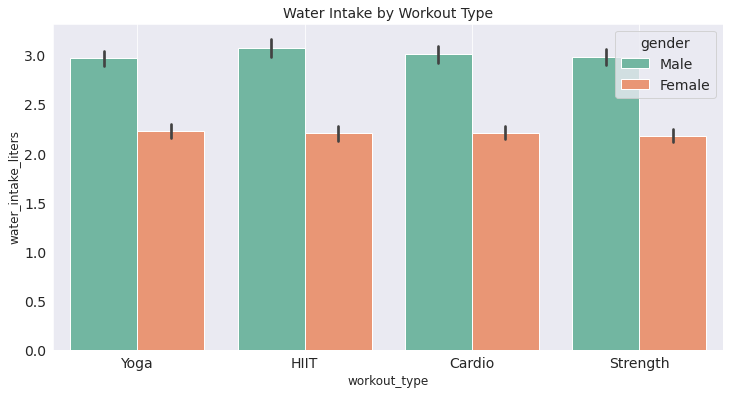

In [0]:
plt.figure(figsize=(12, 6))
plt.title("Water Intake by Workout Type", fontsize=14)
plt.xlabel("Workout Type", fontsize=12)
plt.ylabel("Water Intake (Liters)", fontsize=12)

sns.barplot(data=df1_renamed, x="workout_type", y="water_intake_liters", hue="gender", palette="Set2")
plt.grid()
plt.show()

The bar chart compares average water intake (in liters) by workout type—Yoga, HIIT, Cardio, and Strength—across genders (Male and Female). Overall, males consistently drink more water than females, with error bars indicating variability in the data.

In detail, both genders have the highest water intake during HIIT, followed by Strength, Cardio, and Yoga. Males show slightly higher averages in each category, while Yoga consistently has the lowest water intake for both genders, likely due to its lower physical intensity. The error bars suggest minimal variability, reinforcing these trends.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


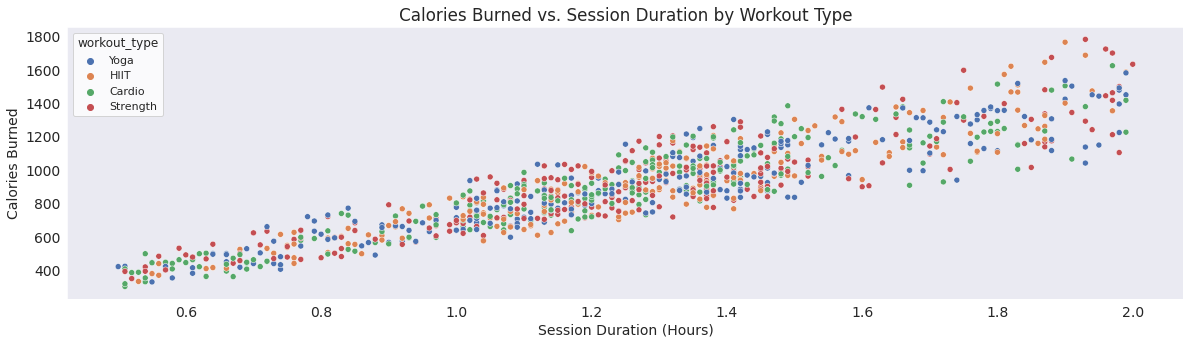

In [0]:
plt.figure(figsize=(20,5))
plt.xlabel('Session Duration (Hours)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Session Duration by Workout Type')
plt.legend(title="Workout Type")

sns.set(style='whitegrid')
sns.scatterplot(data=df1_renamed, x="session_duration_hours", y="calories_burned", hue="workout_type")
plt.grid()
plt.show()

This scatter plot visualizes the relationship between session duration and calories burned for all the workout types. Each point represents a session, and the trend shows that longer durations generally correspond to higher calories burned. 

While observing the plot closely it shows that the HIIT workout seems to burn more calories in shorter duration, suggesting it's intense. The higher session hours for Yoga appears to have a lower calorie burn aligning with its less intense nature. And for the cardio and strength training workout types, it seems to show a more positive linear relationship between the calories burned and session durations.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


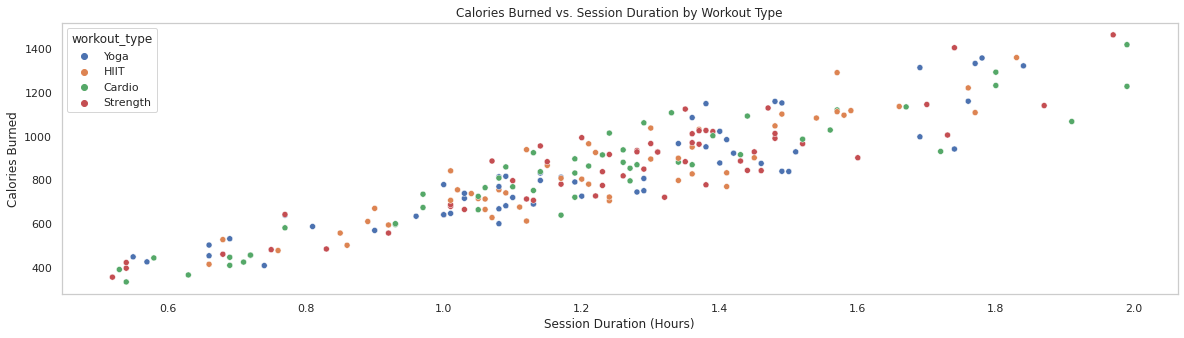

In [0]:
plt.figure(figsize=(20,5))
plt.xlabel('Session Duration (Hours)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Session Duration by Workout Type')
plt.legend(title="Workout Type")

sns.set(style='whitegrid')
sns.scatterplot(data=age_over_50, x="session_duration_hours", y="calories_burned", hue="workout_type")
plt.grid()
plt.show()

This scatter plot depicts the relationship between session duration and calories burned for individuals over the age of 50. Similar to the previous graph, there is a positive correlation where longer sessions generally result in higher calorie burn.

For individuals over 50, Yoga sessions cluster at shorter durations with lower calorie burns, reflecting its lower intensity. In contrast, HIIT, Cardio, and Strength show higher calorie burns with increasing duration, with Strength sessions achieving the highest values for extended workouts. The variability in the scatter suggests individual differences in calorie-burning efficiency even within the same workout type and duration.

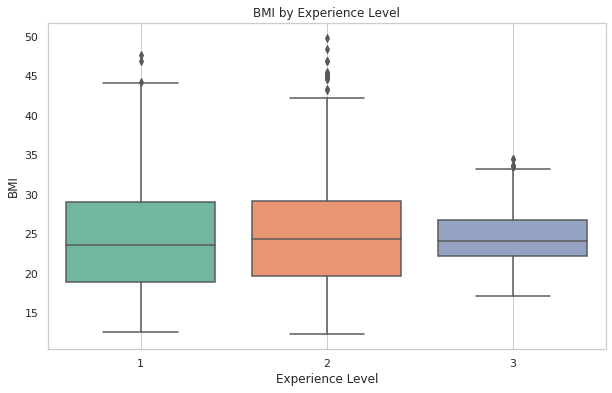

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1_renamed, x="experience_level", y="bmi", palette="Set2")
plt.title("BMI by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("BMI")
plt.grid()
plt.show()

The above box plot compares BMI distributions across three experience levels. Each box shows the interquartile range with a median line, while the whiskers represent the data spread. Outliers, shown as dots, highlight extreme BMI values for each experience level. 

This boxplot shows a decrease in BMI with higher experience levels. Beginners (Level 1) have the highest median BMI and widest spread, aligning with the assumption that they are early in their fitness journey. Intermediate (Level 2) participants show moderate BMI improvements, while advanced (Level 3) individuals have the lowest BMI and tightest spread, reflecting better fitness. This trend confirms that higher fitness levels generally correlate with lower BMI.

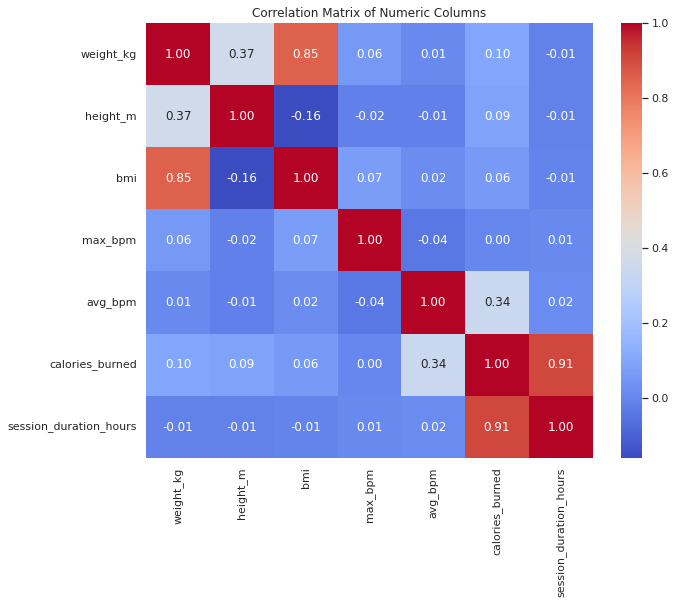

In [0]:
numeric_cols = ["weight_kg", "height_m", "bmi", "max_bpm", "avg_bpm", "calories_burned", "session_duration_hours"]

numeric_df = df1_renamed[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


This heatmap shows the correlation coefficients between different numeric variables in the dataset. Strong positive correlations (red) and strong negative correlations (blue) are indicated, with the notable strong correlation between session duration and calories burned (0.91) indicating that longer workouts result in significantly higher calorie expenditure.

BMI and weight are also strongly correlated (0.85), reflecting BMI's dependence on weight relative to height. A mild correlation (0.34) exists between session duration and average BPM, suggesting that longer sessions slightly increase heart rate. Other variables, such as height and average/max BPM, show weak or near-zero correlations with most features. 